<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [4]:
link =  "https://raw.githubusercontent.com/ZahraMoeini/Regression/main/Data/kc_house_data.csv"

***Read Data***

In [5]:
data = pd.read_csv(link, error_bad_lines=False )

In [6]:
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
hm=data[features].corr()

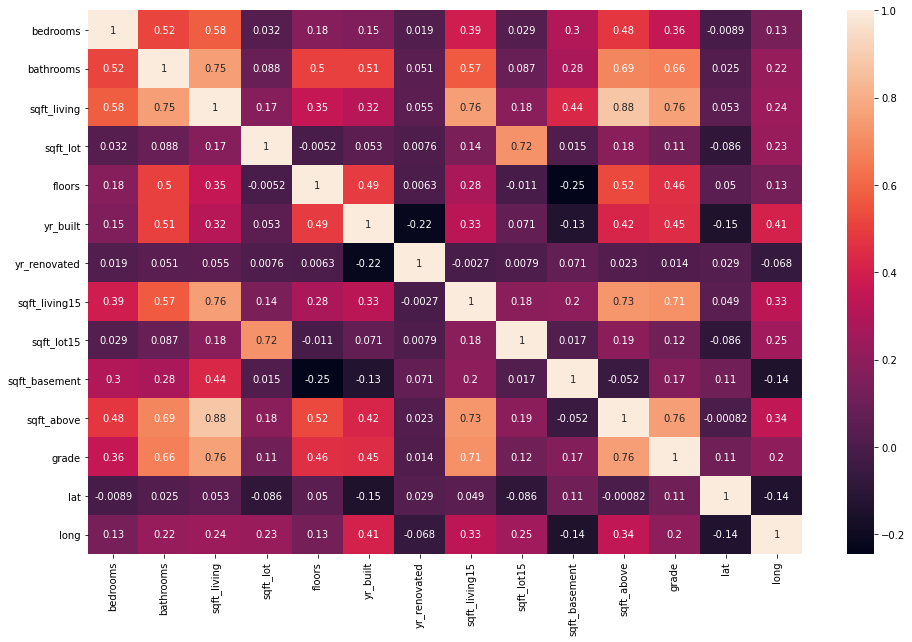

In [64]:
plt.figure(figsize = (16,10))
g=sns.heatmap(hm,annot=True,annot_kws={'size':10})

In [14]:
y=data['price']
X=data
X=X.drop(['price'],axis=1)
X.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
H=X[features]

In [16]:
X_train_val, X_test , y_train_val, y_test = train_test_split(H, y, test_size=0.5, random_state=1)
X_train_val.shape

(10806, 14)

In [17]:
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)
X_train.shape

(8104, 14)

***lambda***

In [53]:
alphas1 = np.array([1e-5,1e-10,1e-15,1e-20, 1e-100])
alphas2 = np.linspace(1,0.01,10)
alphas3 = np.linspace(5000,2,100)
alphas  = np.append(alphas3, alphas2)
alphas  = np.append(alphas, alphas1)
alphas


array([5.00000000e+003, 4.94951515e+003, 4.89903030e+003, 4.84854545e+003,
       4.79806061e+003, 4.74757576e+003, 4.69709091e+003, 4.64660606e+003,
       4.59612121e+003, 4.54563636e+003, 4.49515152e+003, 4.44466667e+003,
       4.39418182e+003, 4.34369697e+003, 4.29321212e+003, 4.24272727e+003,
       4.19224242e+003, 4.14175758e+003, 4.09127273e+003, 4.04078788e+003,
       3.99030303e+003, 3.93981818e+003, 3.88933333e+003, 3.83884848e+003,
       3.78836364e+003, 3.73787879e+003, 3.68739394e+003, 3.63690909e+003,
       3.58642424e+003, 3.53593939e+003, 3.48545455e+003, 3.43496970e+003,
       3.38448485e+003, 3.33400000e+003, 3.28351515e+003, 3.23303030e+003,
       3.18254545e+003, 3.13206061e+003, 3.08157576e+003, 3.03109091e+003,
       2.98060606e+003, 2.93012121e+003, 2.87963636e+003, 2.82915152e+003,
       2.77866667e+003, 2.72818182e+003, 2.67769697e+003, 2.62721212e+003,
       2.57672727e+003, 2.52624242e+003, 2.47575758e+003, 2.42527273e+003,
       2.37478788e+003, 2

In [54]:

lasso = Lasso(normalize=True)
coefs = []
mse_val = []
mse_train = []

In [55]:
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    pred_val = lasso.predict(X_val)
    pred_train = lasso.predict(X_train)
    mse_val.append(mean_squared_error(y_val, pred_val))
    mse_train.append(mean_squared_error(y_train, pred_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13655030704256.562, tolerance: 107062143165.5633
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13644885521130.719, tolerance: 107062143165.5633
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13643952419710.438, tolerance: 107062143165.5633
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136873276

In [56]:
coef_array =np.zeros((len(features),len(alphas)))
for i in range(len(features)):
    for j in range(len(alphas)):
        coef_array[i,j]= coefs[j][i]
        

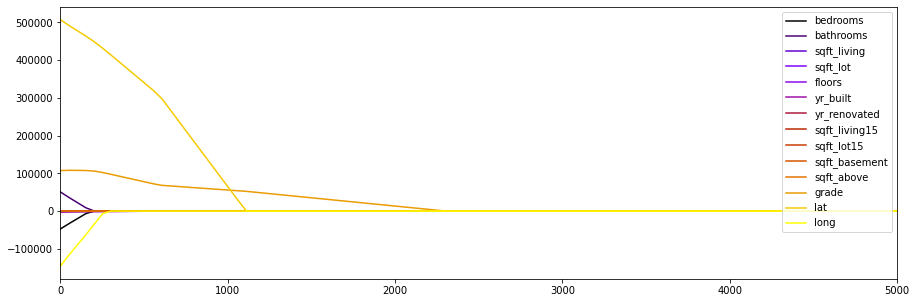

In [57]:
fig = plt.figure(figsize=(15,5))
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(features))]
plt.xlim(min(alphas),max(alphas))
for i in range(coef_array.shape[0]):
    plt.plot(alphas,coef_array[i,:],color=colors[i],label=str(features[i]))
plt.legend(loc='upper right')

In [58]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
sorted_features=[]

for j in range(len(alphas)):
  for i in range(len(features)):
    if coef_array[i,j]==0 and features[i] not in sorted_features:
      sorted_features.append(features[i])
  

In [59]:
sorted_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement',
 'sqft_above',
 'grade',
 'lat',
 'long']

In [60]:
elected_features = sorted_features [int(len(sorted_features)*0.4):]
elected_features

['yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement',
 'sqft_above',
 'grade',
 'lat',
 'long']